In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'C:\\Users\\DELL 2\\Class_May_27_Weekday_Python\\Deep learning\\4 Apr'

In [4]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
# Check imbalance 
df['Liked'].value_counts()/(len(df))*100

1    50.0
0    50.0
Name: Liked, dtype: float64

Data is balanced.

In [9]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Review'],df['Liked'],test_size=0.3,random_state=101)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700,) (300,) (700,) (300,)


Building Classification Model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Pipeline package to merge nlp and machine learning and get the output
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [32]:
classifiers=[
    ('Logistic Regression', LogisticRegression(),{'clf__C':[0.1,1,10],'clf__solver':['liblinear','lbfgs']}),
    ('Multinomial Naive Bayes', MultinomialNB(),{'clf__alpha':[0.1,0.5,1]}),
    ('SVM',SVC(),{'clf__C':[0.1,1,10],'clf__kernel':['linear','rbf']}),
    ('Decision Tree',DecisionTreeClassifier(), {'clf__max_depth':[10,20,30],'clf__min_samples_split':[2,5,10]}),
    ('Random Forest', RandomForestClassifier(), {'clf__n_estimators':[10,50,100], 'clf__max_depth':[10,20,30], 'clf__min_samples_split':[2,5,10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'clf__n_neighbors':[3,5,7],'clf__weights':['uniform','distance']})
    ]

In [37]:
# Initialize list to store the results
names, best_parameter_list, cv_accuracies, test_accuracies, train_accuracies= [],[],[],[],[]

# Iterate over classifiers and parameters
for name, classifier, params in classifiers:
    # Create a pipeline with TF-IDF vectorizer and classifier
    pipe=Pipeline([
        ('tfidf',TfidfVectorizer()),
        ('clf',classifier)
        ])
    
    # Perform hyperparamer tuning using GridSearchCV
    grid= GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')
    grid.fit(x_train,y_train)

    # Get best hyperparameters and best accuracy score
    best_params=grid.best_params_
    best_score=grid.best_score_

    # Test model on test set
    y_pred_train=grid.predict(x_train)
    y_pred_test=grid.predict(x_test)
    accuracy_test= accuracy_score(y_test,y_pred_test)
    accuracy_train= accuracy_score(y_train,y_pred_train)
    conf_matrix= confusion_matrix(y_test,y_pred_test)
    class_report= classification_report(y_test,y_pred_test)

    print(f"{name}:")
    print(f" Best parameters: {best_params}")
    print(f" Best cross validation accuracy: {best_score:.4f}")
    print(f" Test accuracy: {accuracy_test:.4f}")
    print(f" Train accuracy: {accuracy_train:.4f}")
    print(f" Confusion matrix: \n{conf_matrix}")
    print(f" Classification report: \n{class_report}\n")
    
    # Append the results to lists
    names.append(name)
    best_parameter_list.append(best_params)
    cv_accuracies.append(best_score)
    test_accuracies.append(accuracy_test)
    train_accuracies.append(accuracy_train)

Logistic Regression:
 Best parameters: {'clf__C': 1, 'clf__solver': 'liblinear'}
 Best cross validation accuracy: 0.8057
 Test accuracy: 0.8167
 Train accuracy: 0.9600
 Confusion matrix: 
[[118  32]
 [ 23 127]]
 Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       150
           1       0.80      0.85      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300


Multinomial Naive Bayes:
 Best parameters: {'clf__alpha': 0.5}
 Best cross validation accuracy: 0.8000
 Test accuracy: 0.8000
 Train accuracy: 0.9829
 Confusion matrix: 
[[112  38]
 [ 22 128]]
 Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       150
           1       0.77      0.85      0.81       150

    accuracy                           0.80       300


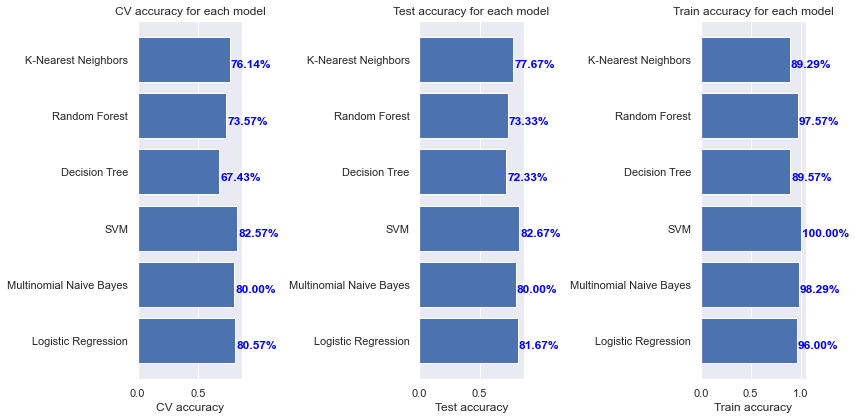

In [40]:
# Plot performance matrix
fig,ax=plt.subplots(1,3,figsize=(12,6))

# Cross-validated accuracies
ax[0].barh(names,cv_accuracies)
ax[0].set_xlabel('CV accuracy')
ax[0].set_title('CV accuracy for each model')
for i,v in enumerate(cv_accuracies):
    ax[0].text(v+0.01,i-0.15,f"{v*100:.2f}%",color='blue',fontweight='bold')
               
# Test accuracies
ax[1].barh(names,test_accuracies)
ax[1].set_xlabel('Test accuracy')
ax[1].set_title('Test accuracy for each model')
for i,v in enumerate(test_accuracies):
    ax[1].text(v+0.01,i-0.15,f"{v*100:.2f}%",color='blue',fontweight='bold')

# Train accuracies
ax[2].barh(names,train_accuracies)
ax[2].set_xlabel('Train accuracy')
ax[2].set_title('Train accuracy for each model')
for i,v in enumerate(train_accuracies):
    ax[2].text(v+0.01,i-0.15,f"{v*100:.2f}%",color='blue',fontweight='bold')


plt.tight_layout()
plt.show()

In [41]:
rf= RandomForestClassifier()

In [43]:
x_train

290    Waited 2 hours & never got either of our pizza...
167    So don't go there if you are looking for good ...
486    They had a toro tartare with a cavier that was...
683                   Very good food, great atmosphere.1
876       I've had better bagels from the grocery store.
                             ...                        
575    The pizza tasted old, super chewy in not a goo...
838    Food is way overpriced and portions are fuckin...
337    The burger... I got the "Gold Standard" a $17 ...
523         first time there and might just be the last.
863                  I love their fries and their beans.
Name: Review, Length: 700, dtype: object

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
x_train=tfidf.fit_transform(x_train).toarray()
#x_test=tfidf.fit_transform(x_test).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [57]:
print(tfidf.get_feature_names_out())

NotFittedError: Vocabulary not fitted or provided

In [58]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
y_train

290    0
167    0
486    1
683    1
876    0
      ..
575    0
838    0
337    0
523    0
863    1
Name: Liked, Length: 700, dtype: int64

In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred_train= rf.predict(x_train)
#y_pred_test= rf.predict(x_test)

In [60]:
from sklearn.model_selection import cross_val_score
train_cv= cross_val_score(rf,x_train,y_train,cv=10)
print(train_cv.mean())

0.7557142857142858


In [61]:
train_cv

array([0.82857143, 0.7       , 0.74285714, 0.71428571, 0.72857143,
       0.77142857, 0.65714286, 0.74285714, 0.87142857, 0.8       ])